### 1. 파일 불러오기

In [1]:
import pandas as pd
true= pd.read_csv('C:/Users/82109/Desktop/파일/Dataset/True.csv')
fake= pd.read_csv('C:/Users/82109/Desktop/파일/Dataset/Fake.csv')

### 2. 라벨 지정

In [2]:
true['label']= 1
fake['label']= 0

### 3. true, fake 합치기

In [3]:
df= pd.concat([true, fake])

### 4. 라벨 분포 확인

c:\Users\82109\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


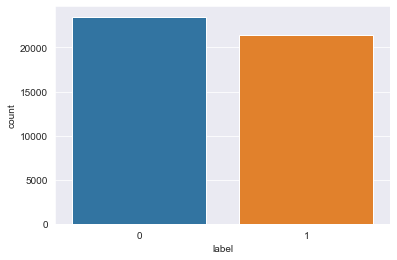

In [4]:
import seaborn as sns
sns.set_style('darkgrid');
sns.countplot(df.label);

### 5. 기사 유형 시각화

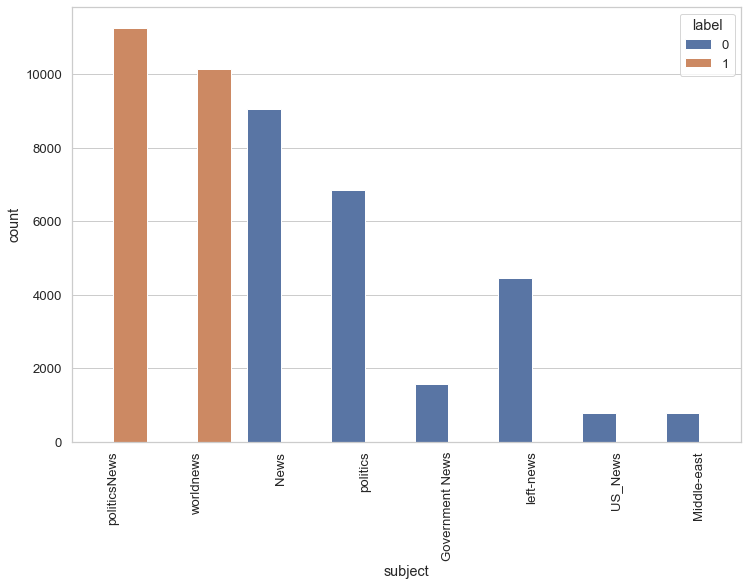

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize= (12, 8))
sns.set(style= 'whitegrid', font_scale= 1.2)
chart= sns.countplot(x= 'subject', hue= 'label', data= df)
chart.set_xticklabels(chart.get_xticklabels(), rotation= 90)
plt.show()

### 6. title + text, 나머지 삭제

In [6]:
df['text']= df['text']+ ' ' + df['title']
del df['title']
del df['subject']
del df['date']

### 7. stop words

In [7]:
from nltk.corpus import stopwords
from string import punctuation
import string

stop= set(stopwords.words('english')) # 불용어
punctouation= list(string.punctuation) # 구두점
stop.update(punctouation) # 불용어에 구두점 추가

### 8. 데이터 정제

In [8]:
from bs4 import BeautifulSoup
import re

# html 태그 삭제하기
def strip_html(text):
    soup= BeautifulSoup(text, 'html.parser')
    return soup.get_text()

# 대괄호 삭제하기
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

# url 삭제
def remove_between_square_barckets(text):
    return re.sub(r'http\S+', '', text)

# stopwords 삭제
def remove_stopwords(text):
    final_text= []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return ' '.join(final_text)

# 함수들 하나로 만들기
def denoise_text(text):
    text= strip_html(text)
    text= remove_between_square_brackets(text)
    text= remove_stopwords(text)
    return text

In [9]:
# 함수 적용시키기
df['text']= df['text'].apply(denoise_text)

c:\Users\82109\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


### 9. wordcloud

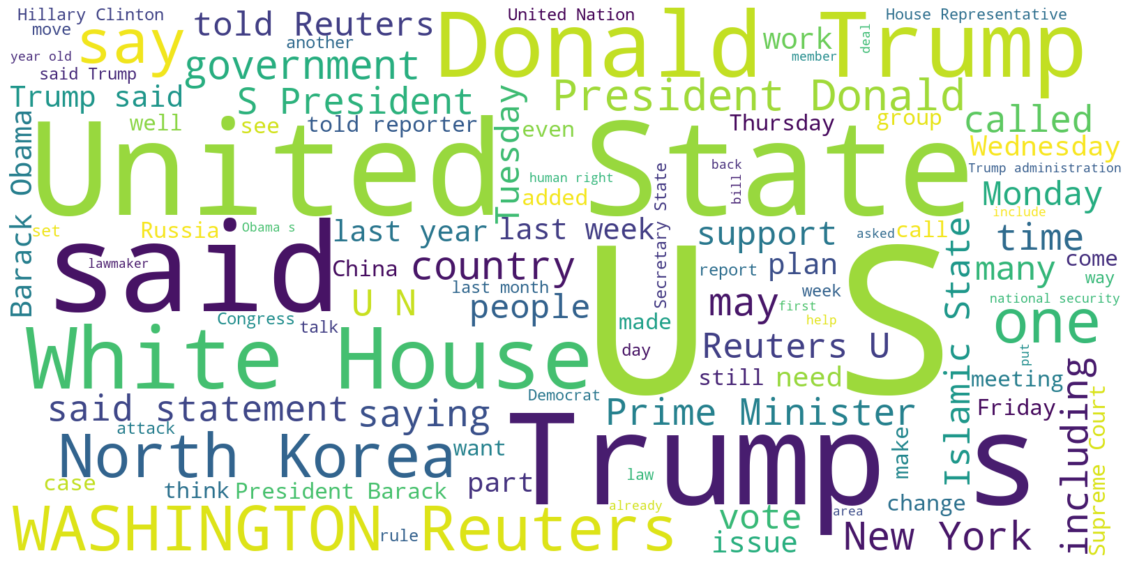

In [10]:
from wordcloud import WordCloud, STOPWORDS

plt.figure(figsize= (20, 20))
wc= WordCloud(background_color= 'white', max_words= 100, width= 1600, height= 800, stopwords= STOPWORDS).generate(' '.join(df[df.label== 1].text))
plt.imshow(wc, interpolation= 'bilinear')
plt.axis('off')
plt.show()

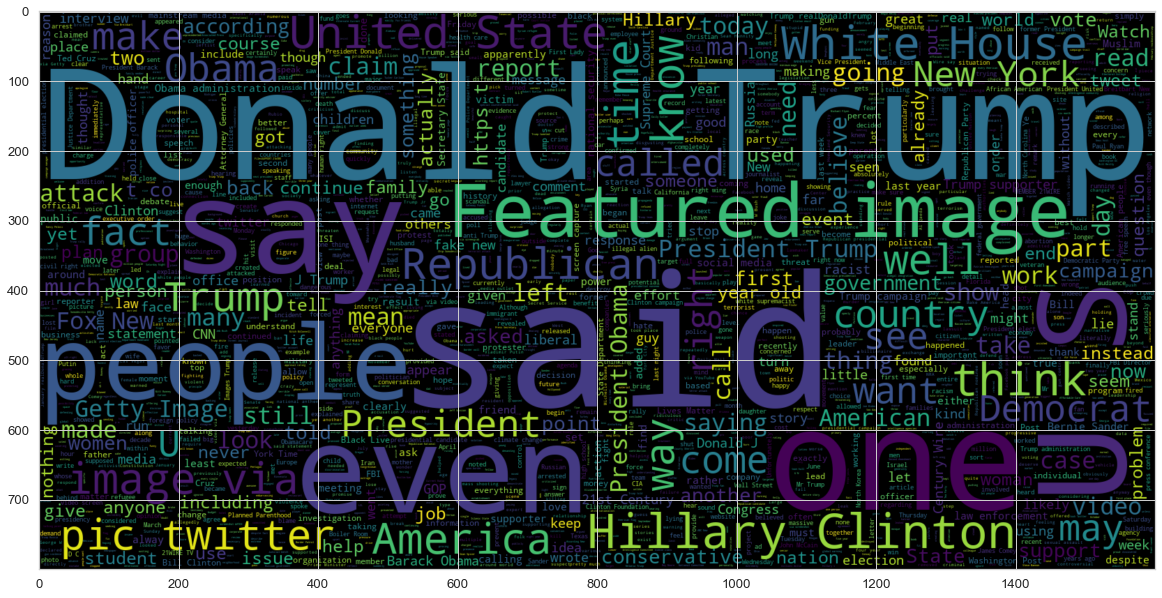

In [11]:
plt.figure(figsize= (20, 20))
wc= WordCloud(max_words= 2000, width= 1600, height= 800, stopwords= STOPWORDS).generate(' '.join(df[df.label== 0].text))
plt.imshow(wc,interpolation= 'bilinear')

### 10. 시각화

#### 1. 전체 text 개수 카운트

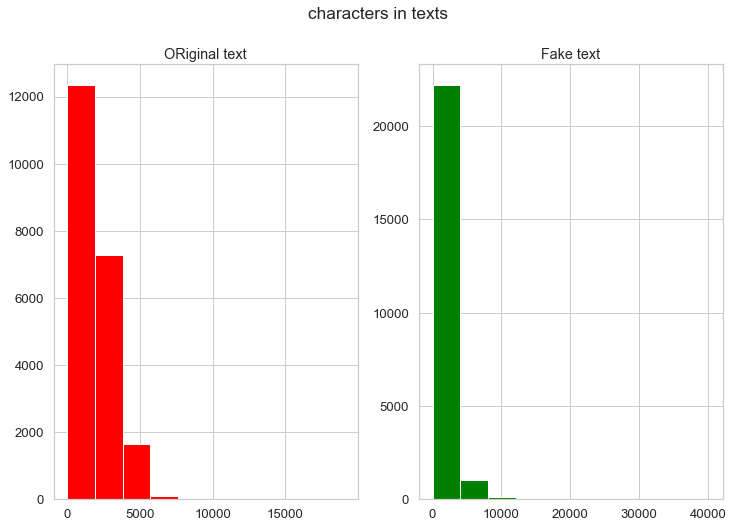

In [12]:
fig, (ax1, ax2)= plt.subplots(1, 2, figsize= (12, 8))
text_len= df[df['label']== 1]['text'].str.len()
ax1.hist(text_len, color= 'red')
ax1.set_title('ORiginal text')
text_len= df[df['label']== 0]['text'].str.len()
ax2.hist(text_len, color= 'green')
ax2.set_title('Fake text')
fig.suptitle('characters in texts')
plt.show()

#### 2. text 단어 수 카운트

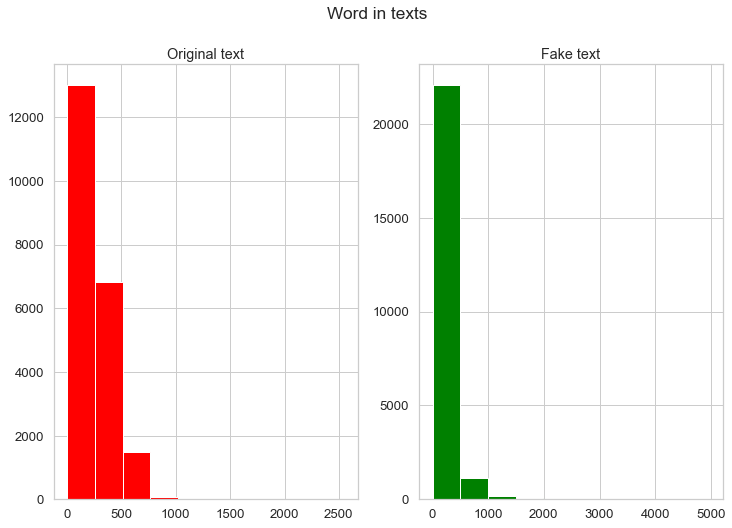

In [13]:
fig, (ax1, ax2)= plt.subplots(1,2, figsize= (12, 8))
text_len= df[df['label']== 1]['text'].str.split().map(lambda x: len(x))
ax1.hist(text_len, color= 'red')
ax1.set_title('Original text')
text_len= df[df['label']== 0]['text'].str.split().map(lambda x: len(x))
ax2.hist(text_len, color= 'green')
ax2.set_title('Fake text')
fig.suptitle('Word in texts')
plt.show()

#### 3. 한문장당 평균 단어 수

c:\Users\82109\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\82109\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'average word length in each text')

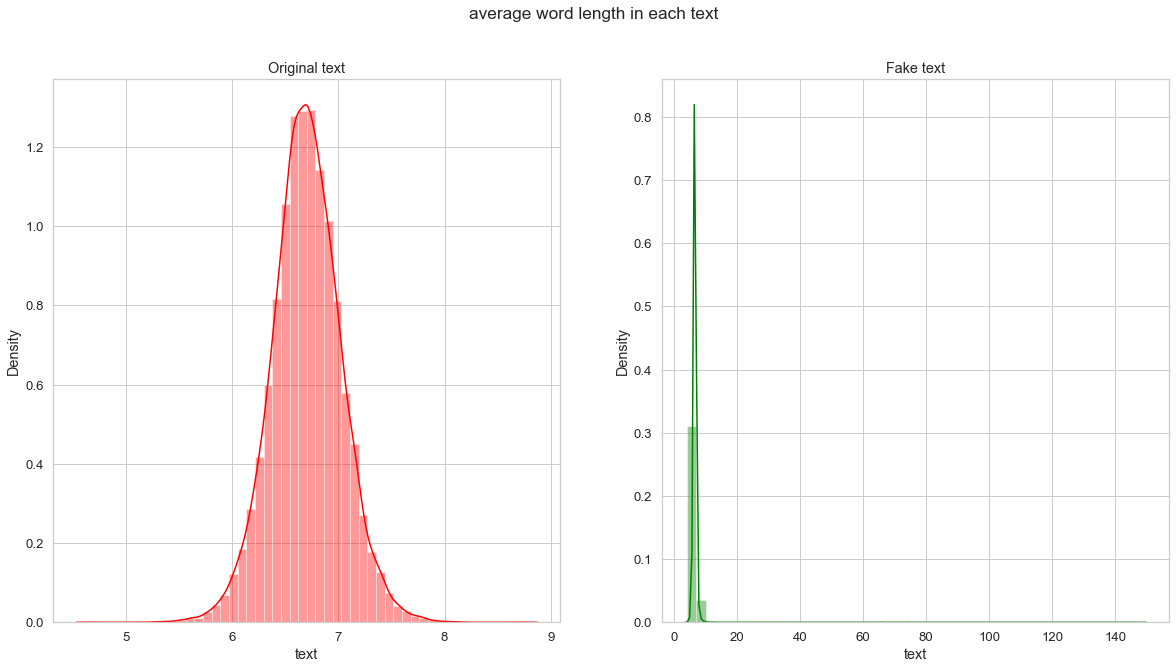

In [14]:
import numpy as np
fig, (ax1, ax2)= plt.subplots(1, 2, figsize= (20, 10))
word= df[df['label']== 1]['text'].str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)), ax= ax1, color= 'red')
ax1.set_title('Original text')
word= df[df['label']== 0]['text'].str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)), ax= ax2, color= 'green')
ax2.set_title('Fake text')
fig.suptitle('average word length in each text')

#### 4. 가장 많은 단어수 5개

In [17]:
def get_corpus(text):
    words= []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words
corpus= get_corpus(df.text)
corpus[:5]

['WASHINGTON', '(Reuters)', 'head', 'conservative', 'Republican']

#### 5. top10 단어들

In [18]:
from collections import Counter
counter= Counter(corpus)
most_common= counter.most_common(10)
most_common= dict(most_common)
most_common

{'Trump': 111486,
 'said': 93144,
 'would': 54601,
 'U.S.': 50430,
 'President': 33171,
 'people': 33107,
 'also': 30316,
 'one': 29363,
 'Donald': 27796,
 'said.': 26189}

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_text_ngrams(corpus, n, g):
    vec= CountVectorizer(ngram_range= (g,g)).fit(corpus)
    bag_of_words= vec.transform(corpus)
    sum_words= bag_of_words.sum(axis= 0)
    words_freq= [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq= sorted(words_freq, key= lambda x: x[1], reverse= True)
    return words_freq[:n]

<AxesSubplot:>

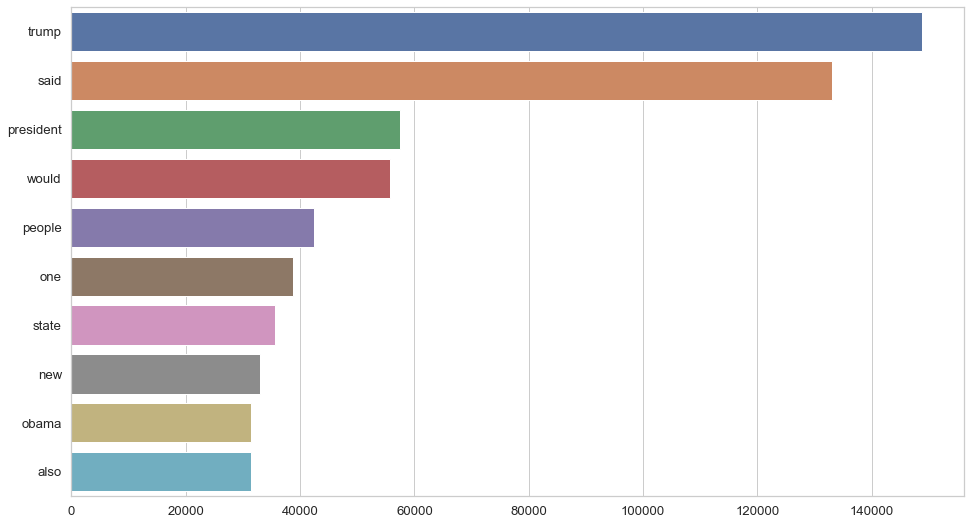

In [22]:
plt.figure(figsize= (16, 9))
most_common_uni= get_top_text_ngrams(df.text, 10, 1)
most_common_uni= dict(most_common_uni)
sns.barplot(x= list(most_common_uni.values()), y= list(most_common_uni.keys()))

<AxesSubplot:>

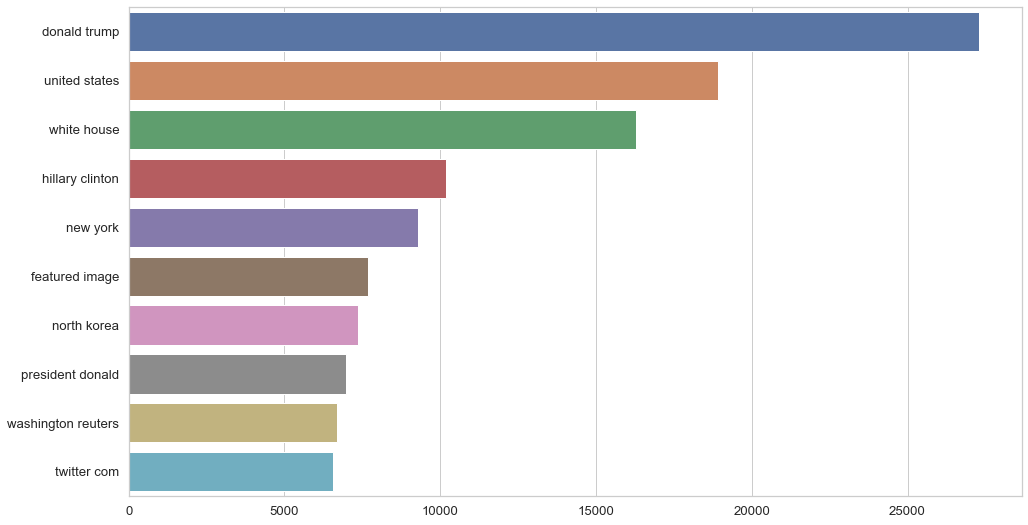

In [23]:
plt.figure(figsize= (16, 9))
most_common_bi= get_top_text_ngrams(df.text, 10, 2)
most_common_bi= dict(most_common_bi)
sns.barplot(x= list(most_common_bi.values()), y= list(most_common_bi.keys()))

<AxesSubplot:>

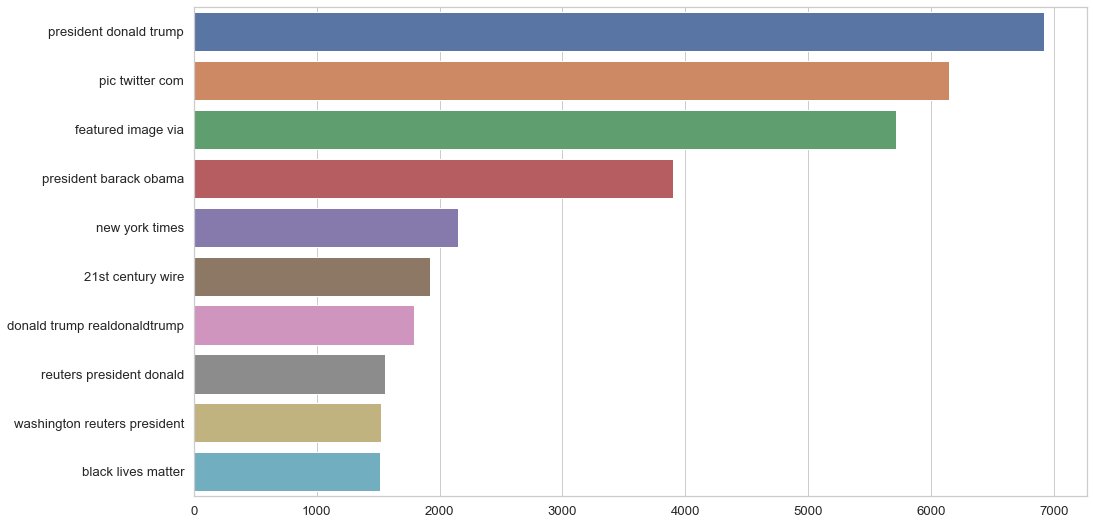

In [24]:
plt.figure(figsize= (16, 9))
most_common_tri= get_top_text_ngrams(df.text, 10, 3)
most_common_tri= dict(most_common_tri)
sns.barplot(x= list(most_common_tri.values()), y= list(most_common_tri.keys()))

### 11. train, test 분리

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(df.text, df.label, random_state= 0)

### 12. 토큰

In [30]:
max_features= 10000
maxlen= 300

In [37]:
from keras.preprocessing import text, sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer= text.Tokenizer(num_words= max_features)
tokenizer.fit_on_texts(x_train)
tokenized_train= tokenizer.texts_to_sequences(x_train)

x_train= pad_sequences(tokenized_train, maxlen= maxlen)